Using CPU. Note: This module is much faster with a GPU.
C:\Users\Anant2005\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
C:\Users\Anant2005\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


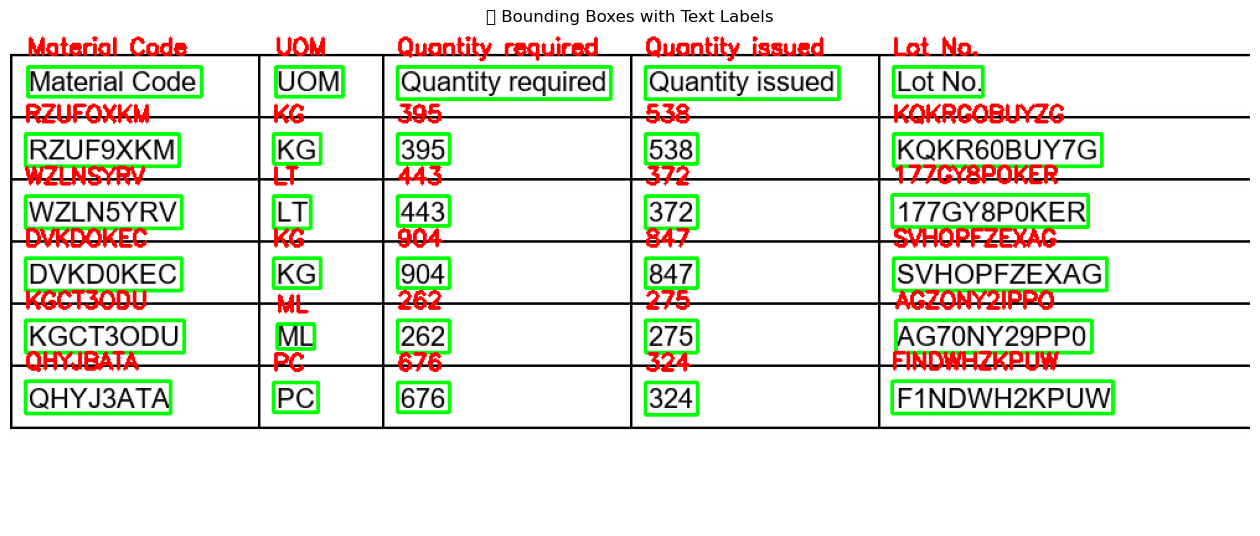

In [20]:
import easyocr
import cv2
import matplotlib.pyplot as plt

# Load EasyOCR
reader = easyocr.Reader(['en'], gpu=False)

# Path to image
image_path = r"C:\Users\Anant2005\Desktop\Eugia_Project\test image\WhatsApp Image 2025-06-25 at 16.37.21_a376a29e.jpg"

# Read image with OpenCV
image = cv2.imread(image_path)

# Run OCR and get results
results = reader.readtext(image_path)

# Draw bounding boxes and labels
for bbox, text, _ in results:
    top_left = tuple(map(int, bbox[0]))
    bottom_right = tuple(map(int, bbox[2]))
    
    cv2.rectangle(image, top_left, bottom_right, (0, 255, 0), 2)
    cv2.putText(image, text, (top_left[0], top_left[1] - 10),
                cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 255), 2)

# Convert BGR (OpenCV) to RGB (matplotlib)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Display the image using matplotlib
plt.figure(figsize=(16, 10))
plt.imshow(image_rgb)
plt.axis('off')
plt.title("📦 Bounding Boxes with Text Labels")
plt.show()


In [5]:
import easyocr

# Initialize EasyOCR
reader = easyocr.Reader(['en'], gpu=False)

# Image path
image_path = r"C:\Users\Anant2005\Desktop\Eugia_Project\test image\generated_table.png"

# Run OCR
results = reader.readtext(image_path)

# Print only the text (ignore bounding boxes and confidence)
print("📄 Extracted Text:")
for _, text, _ in results:
    print(text)


Using CPU. Note: This module is much faster with a GPU.


📄 Extracted Text:
Material Code
UOM
Quantity Required
Quantity Issued
Lot No
JWQWO18J
KG
120
767
LT364YPIGDB
2533LLUT
ML
273
964
SEIIVNWQGTI
GCNR1ZJD
ML
217
376
RUWBYFATNXN
MPAMFHCH
ML
758
623
LSMNLZYI7O9
4KE4INUV
ML
632
76
R8SZ8HACU4A


In [7]:
import easyocr
import pandas as pd

# Step 1: Run OCR
reader = easyocr.Reader(['en'], gpu=False)
image_path = r"C:\Users\Anant2005\Desktop\Eugia_Project\test image\WhatsApp Image 2025-06-25 at 16.37.21_a376a29e.jpg"

results = reader.readtext(image_path)

# Step 2: Extract only text
texts = [text for _, text, _ in results]

# Step 3: Manually set number of columns (based on your table)
num_columns = 5

# Step 4: Reshape text list into rows of the table
rows = [texts[i:i + num_columns] for i in range(0, len(texts), num_columns)]

# Step 5: Create DataFrame
df = pd.DataFrame(rows)

# Step 6: Set header from first row if applicable
df.columns = df.iloc[0]
df = df[1:].reset_index(drop=True)

# Step 7: Display as table in Jupyter
df.style.set_properties(**{'text-align': 'left'})


Using CPU. Note: This module is much faster with a GPU.
C:\Users\Anant2005\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


0,Material Code,UOM,Quantity required,Quantity issued,Lot No.
0,RZUFOXKM,KG,395,538,KQKRGOBUYZG
1,WZLNSYRV,LT,443,372,177GY8POKER
2,DVKDOKEC,KG,904,847,SVHOPFZEXAG
3,KGCT3ODU,ML,262,275,AGZONY2IPPO
4,QHYJBATA,PC,676,324,FINDWHZKPUW


In [8]:
import pyodbc

# SQL Connection
conn_str = (
    "Driver={SQL Server};"
    "Server=Anant;"
    "Database=eugiaDB;"
    "Trusted_Connection=yes;"
)
conn = pyodbc.connect(conn_str)
cursor = conn.cursor()

# Force everything as string
df = df.astype(str)

for index, row in df.iterrows():
    values = tuple(row)
    
    sql_query = """
        INSERT INTO dbo.final 
        ([Material Code], [UOM], [Quantity Required], [Quantity Issued], [Lot No])
        VALUES (?, ?, ?, ?, ?)
    """
    try:
        cursor.execute(sql_query, values)
    except Exception as e:
        print(f"❌ Row {index} failed: {e}")

conn.commit()
conn.close()

print("✅ All data inserted as string values into SQL Server table.")


✅ All data inserted as string values into SQL Server table.


In [9]:
import easyocr
import pandas as pd
import pyodbc

# --------- OCR Setup ---------
reader = easyocr.Reader(['en'], gpu=False)
image_path = r"C:\Users\Anant2005\Desktop\Eugia_Project\test image\generated_table.png"
results = reader.readtext(image_path)

# --------- Sort by Bounding Boxes ---------
# Sort vertically (Y), then horizontally (X)
sorted_results = sorted(results, key=lambda r: (round(r[0][0][1] / 10) * 10, r[0][0][0]))

# Extract text
texts = [text for _, text, _ in sorted_results]

# --------- Convert to DataFrame ---------
num_columns = 6  # Including Serial_No
rows = [texts[i:i + num_columns] for i in range(0, len(texts), num_columns)]

df = pd.DataFrame(rows, columns=[
    'Serial_No', 'Material Code', 'UOM', 'Quantity Required', 'Quantity Issued', 'Lot No'
])

# Drop header row if detected
if df.iloc[0]['UOM'].lower().startswith('uom') or 'material' in df.iloc[0]['Material Code'].lower():
    df = df.iloc[1:]

# Drop Serial_No
df = df.drop(columns=['Serial_No'])

# --------- SQL Connection and Insertion ---------
conn_str = (
    "Driver={SQL Server};"
    "Server=Anant;"
    "Database=eugiaDB;"
    "Trusted_Connection=yes;"
)
conn = pyodbc.connect(conn_str)
cursor = conn.cursor()

# Force everything as string
df = df.astype(str)

for index, row in df.iterrows():
    values = tuple(row)
    
    sql_query = """
        INSERT INTO dbo.final 
        ([Material Code], [UOM], [Quantity Required], [Quantity Issued], [Lot No])
        VALUES (?, ?, ?, ?, ?)
    """
    try:
        cursor.execute(sql_query, values)
    except Exception as e:
        print(f"❌ Row {index} failed: {e}")

conn.commit()
conn.close()

print("✅ All data inserted as string values into SQL Server table.")


Using CPU. Note: This module is much faster with a GPU.
C:\Users\Anant2005\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


✅ All data inserted as string values into SQL Server table.


This gives the correct out put of the image.

In [ ]:
import easyocr
import pandas as pd
import pyodbc

# ---------- OCR Setup ----------
reader = easyocr.Reader(['en'], gpu=False)
image_path = r"C:/Users/Anant2005/Desktop/Eugia_Project/test image/WhatsApp Image 2025-06-25 at 16.37.21_a376a29e.jpg"
results = reader.readtext(image_path)

# ---------- Group Text by Row ----------
# Helper: get Y-center and X-left of a box
def get_y_center(bbox):
    return (bbox[0][1] + bbox[2][1]) / 2

def get_x_left(bbox):
    return bbox[0][0]

# Step 1: Add Y center to each box
annotated = [(get_y_center(bbox), get_x_left(bbox), text) for bbox, text, _ in results]

# Step 2: Group by similar Y (i.e., same row) using ±10 pixel threshold
annotated.sort(key=lambda x: x[0])  # sort by Y

grouped_rows = []
current_row = []
threshold = 10  # adjust if rows are too close/far

for i, item in enumerate(annotated):
    y, x, text = item
    if not current_row:
        current_row.append(item)
    else:
        prev_y = current_row[-1][0]
        if abs(y - prev_y) <= threshold:
            current_row.append(item)
        else:
            grouped_rows.append(current_row)
            current_row = [item]
if current_row:
    grouped_rows.append(current_row)

# Step 3: Sort each row by X (left to right)
final_rows = []
for row in grouped_rows:
    row.sort(key=lambda x: x[1])  # sort by X
    final_rows.append([text for _, _, text in row])

# Step 4: Drop header row if present
if any("material" in s.lower() for s in final_rows[0]):
    final_rows = final_rows[1:]

# Step 5: Keep only valid rows with 6 columns (Serial_No + 5 fields)
cleaned_rows = [r for r in final_rows if len(r) == 6]

# Step 6: Convert to DataFrame, remove Serial_No
df = pd.DataFrame(cleaned_rows, columns=[
    'Serial_No', 'Material Code', 'UOM', 'Quantity Required', 'Quantity Issued', 'Lot No'
])
df = df.drop(columns=['Serial_No'])
df = df.astype(str)  # ensure all are strings

print("📊 Final rows going into database:")
for row in final_rows:
    print(row)


In [29]:
import easyocr
import pandas as pd
import pyodbc

# ---------- OCR Setup ----------
reader = easyocr.Reader(['en'], gpu=False)
image_path = r"C:/Users/Anant2005/Desktop/Eugia_Project/test image/WhatsApp Image 2025-06-25 at 16.37.21_a376a29e.jpg"
results = reader.readtext(image_path)

# ---------- Group Text by Row ----------
# Helper: get Y-center and X-left of a box
def get_y_center(bbox):
    return (bbox[0][1] + bbox[2][1]) / 2

def get_x_left(bbox):
    return bbox[0][0]

# Step 1: Add Y center to each box
annotated = [(get_y_center(bbox), get_x_left(bbox), text) for bbox, text, _ in results]

# Step 2: Group by similar Y (i.e., same row) using ±10 pixel threshold
annotated.sort(key=lambda x: x[0])  # sort by Y

grouped_rows = []
current_row = []
threshold = 10  # adjust if rows are too close/far

for i, item in enumerate(annotated):
    y, x, text = item
    if not current_row:
        current_row.append(item)
    else:
        prev_y = current_row[-1][0]
        if abs(y - prev_y) <= threshold:
            current_row.append(item)
        else:
            grouped_rows.append(current_row)
            current_row = [item]
if current_row:
    grouped_rows.append(current_row)

# Step 3: Sort each row by X (left to right)
final_rows = []
for row in grouped_rows:
    row.sort(key=lambda x: x[1])  # sort by X
    final_rows.append([text for _, _, text in row])

# Step 4: Drop header row if present
if any("material" in s.lower() for s in final_rows[0]):
    final_rows = final_rows[1:]

# Step 5: Keep only valid rows with 6 columns (Serial_No + 5 fields)
cleaned_rows = [r for r in final_rows if len(r) == 6]

# Step 6: Convert to DataFrame, remove Serial_No
df = pd.DataFrame(cleaned_rows, columns=[
    'Serial_No', 'Material Code', 'UOM', 'Quantity Required', 'Quantity Issued', 'Lot No'
])
df = df.drop(columns=['Serial_No'])
df = df.astype(str)  # ensure all are strings

print("📊 Final rows going into database:")
for row in final_rows:
    print(row)



# ----- SQL Connection Setup -----
conn_str = (
    "Driver={SQL Server};"
    "Server=Anant;"
    "Database=eugiaDB;"
    "Trusted_Connection=yes;"
)
conn = pyodbc.connect(conn_str)
cursor = conn.cursor()

# ----- SQL Insert -----
sql_query = """
    INSERT INTO dbo.final 
    ([Material Code], [UOM], [Quantity Required], [Quantity Issued], [Lot No])
    VALUES (?, ?, ?, ?, ?)
"""

# ----- Insert Each Row -----
for i, row in enumerate(final_rows):
    if len(row) != 5:
        print(f"⚠️ Skipping row {i} due to incorrect column count: {row}")
        continue
    values = tuple(str(x) for x in row)
    try:
        cursor.execute(sql_query, values)
        print(f"✅ Inserted row {i+1}: {values}")
    except Exception as e:
        print(f"❌ Failed to insert row {i+1}: {e}")

conn.commit()
conn.close()
print("🎯 All rows inserted successfully.")


Using CPU. Note: This module is much faster with a GPU.
C:\Users\Anant2005\anaconda3\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


📊 Final rows going into database:
['RZUFOXKM', 'KG', '395', '538', 'KQKRGOBUYZG']
['WZLNSYRV', 'LT', '443', '372', '177GY8POKER']
['DVKDOKEC', 'KG', '904', '847', 'SVHOPFZEXAG']
['KGCT3ODU', 'ML', '262', '275', 'AGZONY2IPPO']
['QHYJBATA', 'PC', '676', '324', 'FINDWHZKPUW']
✅ Inserted row 1: ('RZUFOXKM', 'KG', '395', '538', 'KQKRGOBUYZG')
✅ Inserted row 2: ('WZLNSYRV', 'LT', '443', '372', '177GY8POKER')
✅ Inserted row 3: ('DVKDOKEC', 'KG', '904', '847', 'SVHOPFZEXAG')
✅ Inserted row 4: ('KGCT3ODU', 'ML', '262', '275', 'AGZONY2IPPO')
✅ Inserted row 5: ('QHYJBATA', 'PC', '676', '324', 'FINDWHZKPUW')
🎯 All rows inserted successfully.
